   player_id               name  nationality  position  overall  age  hits  \
0     158023       Lionel Messi    Argentina  ST|CF|RW       94   33   299   
1      20801  Cristiano Ronaldo     Portugal     ST|LW       93   35   276   
2     190871          Neymar Jr       Brazil    CAM|LW       92   28   186   
3     203376    Virgil van Dijk  Netherlands        CB       91   29   127   
4     200389          Jan Oblak     Slovenia        GK       91   27    47   

   potential                  team  
0         94         FC Barcelona   
1         93             Juventus   
2         92  Paris Saint-Germain   
3         92            Liverpool   
4         93      Atlético Madrid   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  obj

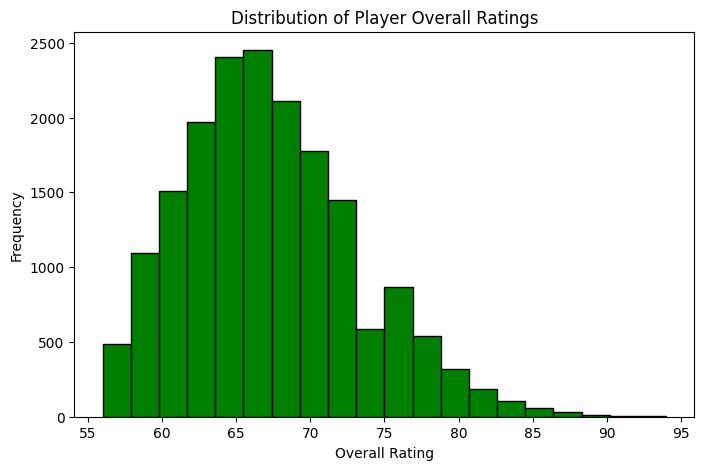

In [42]:
#Task 2
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'C:\Users\Owner\Downloads\archive\FIFA-21 Complete.csv'

df = pd.read_csv(file_path, delimiter=';')

# View the first few rows of the DataFrame
print(df.head())

# Get information about the columns and data types
print(df.info())

# Print the list of column names in the DataFrame
print(df.columns)


# Generate summary statistics for numerical columns
print(df.describe())

print(df.isnull().sum())

plt.figure(figsize=(8, 5))
plt.hist(df['overall'], bins=20, color='green', edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Overall Ratings')
plt.show()

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64


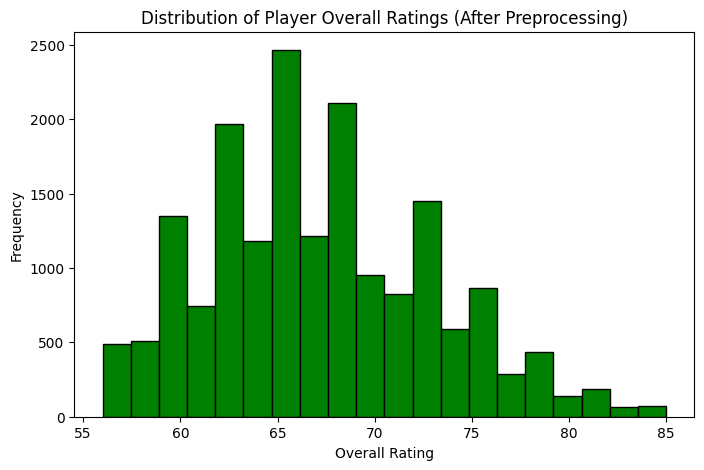

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the data into a pandas DataFrame with the correct delimiter
file_path = r'C:\Users\Owner\Downloads\archive\FIFA-21 Complete.csv'
df = pd.read_csv(file_path, delimiter=';')

# Step 3: Data Preprocessing

# 3.1 Handle Missing Values
print(df.isnull().sum())



mean_overall = df['overall'].mean()
df['overall'].fillna(mean_overall, inplace=True)

# 3.2 Handle Outliers
# Identify and handle outliers in numerical columns using z-scores or other methods.
# For this example, let's identify and handle outliers in the 'overall' column using z-scores.

z_scores = np.abs((df['overall'] - df['overall'].mean()) / df['overall'].std())
outlier_threshold = 3  # Adjust this threshold based on your dataset and domain knowledge
outliers = df[z_scores > outlier_threshold]
df = df[z_scores <= outlier_threshold]

# Create new features or modify existing ones to enhance the dataset's predictive power.

# Define age group categories and corresponding labels
age_groups = [0, 25, 30, 35, np.inf]
age_group_labels = ['0-25', '26-30', '31-35', '36+']

# Categorize players into age groups
df['age_group'] = pd.cut(df['age'], bins=age_groups, labels=age_group_labels, right=False)

# Step 4: Data Exploration

plt.figure(figsize=(8, 5))
plt.hist(df['overall'], bins=20, color='green', edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Overall Ratings (After Preprocessing)')
plt.show()


Support Vector Regression (SVR) Performance:
Mean Squared Error (MSE): 32.004814619786465
R-squared (R2): 0.0819840967250538

Random Forest Regression Performance:
Mean Squared Error (MSE): 16.05832110725115
R-squared (R2): 0.5393882348176946


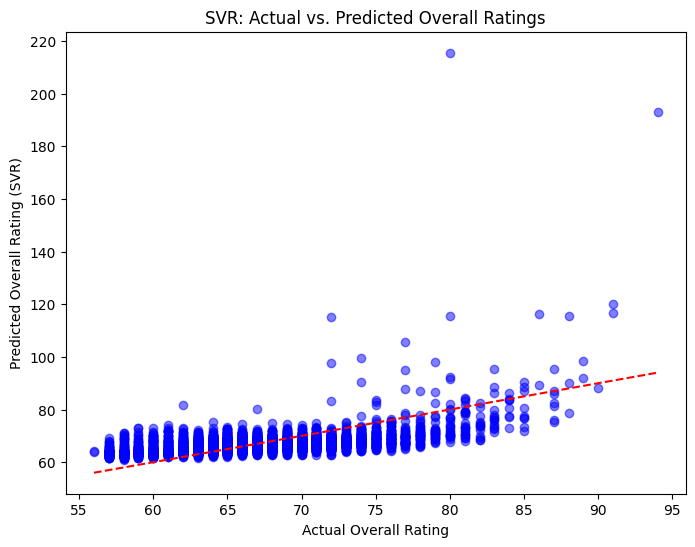

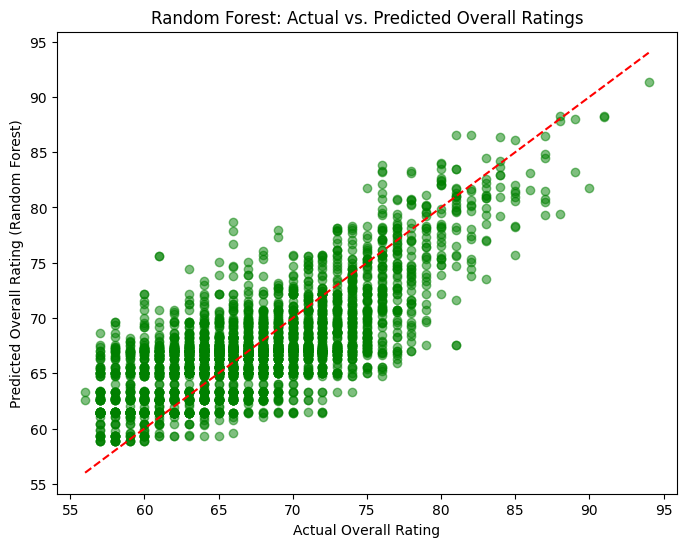

In [31]:
#Task 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the data into a pandas DataFrame with the correct delimiter
file_path = r'C:\Users\Owner\Downloads\archive\FIFA-21 Complete.csv'
df = pd.read_csv(file_path, delimiter=';')

# Step 4: Implement Machine Learning Models and Visualization

# Prepare the features (X) and target (y) for machine learning
X = df[['age', 'hits']]
y = df['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Support Vector Regression (SVR)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Implement Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models using metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Compare the performance of the models
print("Support Vector Regression (SVR) Performance:")
print("Mean Squared Error (MSE):", mse_svr)
print("R-squared (R2):", r2_svr)

print("\nRandom Forest Regression Performance:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

# Step 5: Visualization


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating (SVR)')
plt.title('SVR: Actual vs. Predicted Overall Ratings')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating (Random Forest)')
plt.title('Random Forest: Actual vs. Predicted Overall Ratings')
plt.show()



In [38]:
#Task 4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = r'C:\Users\Owner\Downloads\archive\FIFA-21 Complete.csv'
df = pd.read_csv(file_path, delimiter=';')

# Step 4: Implement Machine Learning Models

# Prepare the features (X) and target (y) for machine learning
X = df[['age', 'hits']]
y = df['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Support Vector Regression (SVR)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Implement Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models using metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Compare the performance of the models
print("Support Vector Regression (SVR) Performance:")
print("Mean Squared Error (MSE):", mse_svr)
print("R-squared (R2):", r2_svr)

print("\nRandom Forest Regression Performance:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)


Support Vector Regression (SVR) Performance:
Mean Squared Error (MSE): 32.004814619786465
R-squared (R2): 0.0819840967250538

Random Forest Regression Performance:
Mean Squared Error (MSE): 16.05832110725115
R-squared (R2): 0.5393882348176946


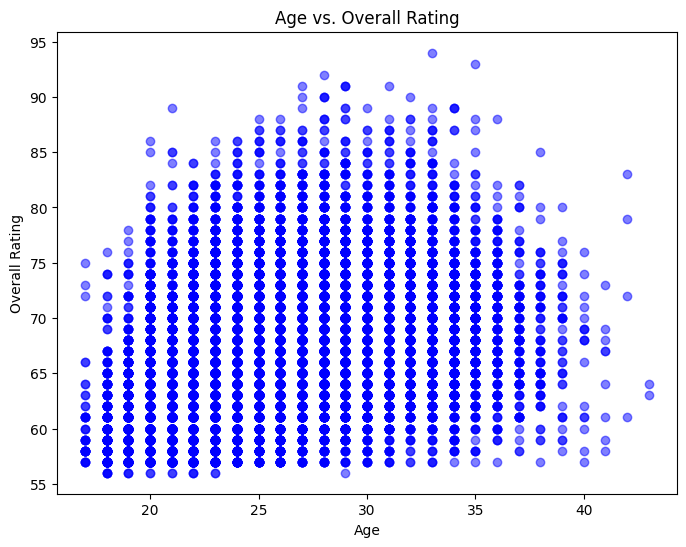

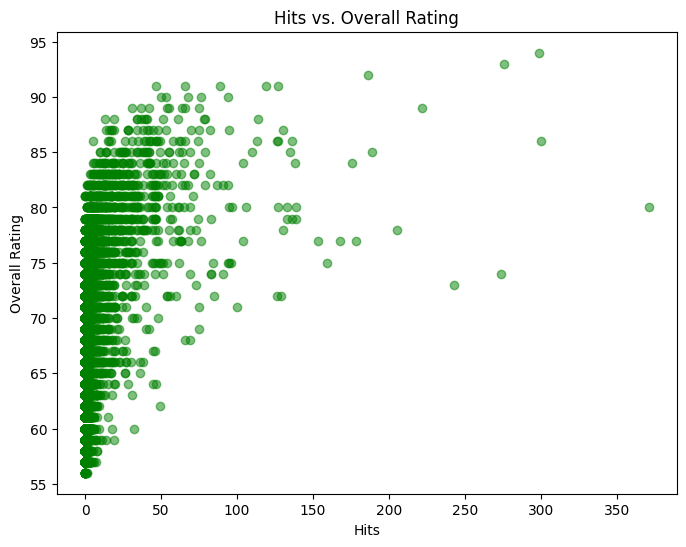

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


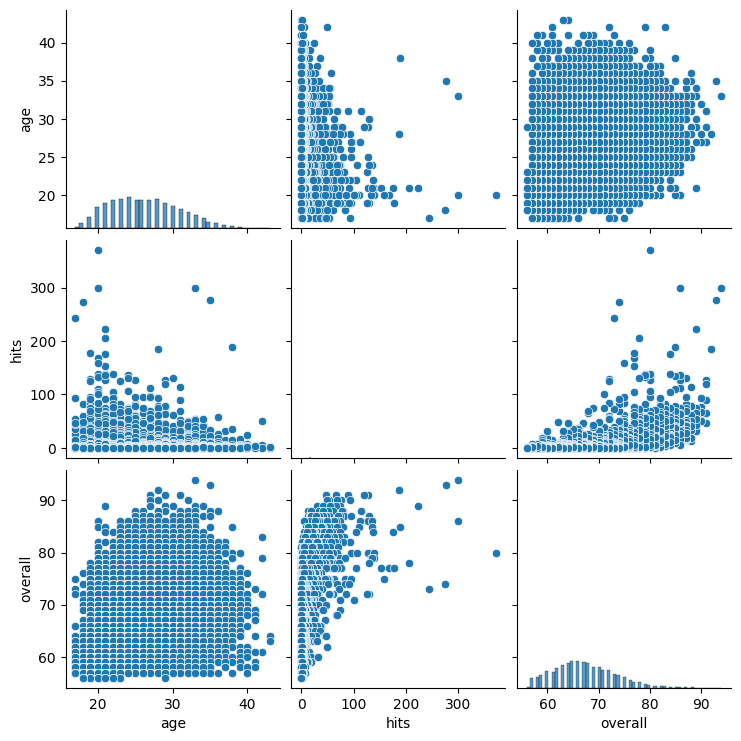

In [37]:
#Task 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\Owner\Downloads\archive\FIFA-21 Complete.csv'
df = pd.read_csv(file_path, delimiter=';')

# Step 5: Visualization

# Scatter plot of Age vs. Overall Rating
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['overall'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Age vs. Overall Rating')
plt.show()

# Scatter plot of Hits vs. Overall Rating
plt.figure(figsize=(8, 6))
plt.scatter(df['hits'], df['overall'], color='green', alpha=0.5)
plt.xlabel('Hits')
plt.ylabel('Overall Rating')
plt.title('Hits vs. Overall Rating')
plt.show()

# Pairplot to visualize the relationships between 'age', 'hits', and 'overall' rating
sns.pairplot(df[['age', 'hits', 'overall']])
plt.show()


In [35]:
df.to_csv('preprocessed_fifa21_data.csv', index=False)